In [163]:
# Currently seeking first professional opportunity; experience gained through
# coursework and hands-on projects.

# The dataset contains 569 samples, each with 30 features and a label indicating 
# whether a tumor was malignant (0) or benign (1). There are only two labels, so this 
# dataset is commonly used to perform binary classification. Using this dataset, reimplement 
# the steps of this chapter’s classification case study in Sections 15.2–15.3. 
# Use the GaussianNB (short for Gaussian Naive Bayes) estimator. When you execute multiple 
# classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer 
# Wisconsin Diagnostic dataset, include a LogisticRegression classifier in the estimators 
# dictionary. Logistic regression is another popular algorithm for binary classification.

In [164]:
# Loading the Dataset 

In [165]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [166]:
# Checking the Sample and Target Sizes

In [167]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [168]:
# Every 50 sample you want to hit the target which are the label above the data.

In [169]:
breast_cancer.target[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [170]:
# 569 columns(samples) and 30 data arrays(features)

In [171]:
breast_cancer.data.shape

(569, 30)

In [172]:
# Target array's shape

In [173]:
breast_cancer.target.shape

(569,)

In [174]:
# Splitting the Data for Training and Testing

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split( breast_cancer.data, breast_cancer.target, random_state = 11)

In [176]:
# Training and Testing Set Sizes

In [177]:
# Train
X_train.shape  # Reserves 75% of the data for training 

(426, 30)

In [178]:
# Testing
X_test.shape   # Reserves 25% of the data for testing 

(143, 30)

In [179]:
# Specifies that 20% of the data is for testing, so train_size is inferred to be 0.80.
X_train, X_test, y_train, y_test = train_test_split (breast_cancer.data, breast_cancer.target, 
                                                     random_state=11, test_size = 0.20)

In [180]:
# Creating the Model (GaussianNB)

In [181]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [182]:
# Training the Model

In [183]:
GNB.fit(X=X_train, y=y_train)

,priors,None
,var_smoothing,1e-09


In [184]:
# Predicting 

In [185]:
predicted = GNB.predict(X=X_test)
expected = y_test

In [186]:
# predicted digits vs. expected digits for the first 20 test samples:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [187]:
expected [:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [188]:
# Using a list comprehesion to locate all the incorrect predictioncs for the entire test set.
# Where the predicted and expected values do not match.

In [189]:
wrong = [(p, e) for (p, e) in zip (predicted, expected) if p != e]
wrong

[(np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(0)),
 (np.int64(0), np.int64(1)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(0))]

In [190]:
# Estimator Method score

In [191]:
print (f'{GNB.score(X_test, y_test):.2%}')

93.86%


In [192]:
# Confusion Matrix

In [193]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)     # Another way to check a classification 
                                                                    # estimator’s accuracy is via a confusion 
                                                                    # matrix, which shows the correct and incorrect
                                                                    # predicted values (also known as the hits and 
                                                                    # misses) for a given class. 


In [194]:
# Prinicpal diagonal - the diagonal from top0-left to bottom-right are the correct prediction.
confusion 

array([[32,  6],
       [ 1, 75]])

In [195]:
# Classification Report

In [196]:
from sklearn.metrics import classification_report
names = [str(breast_cancer) for breast_cancer in breast_cancer.target_names]
print(classification_report(expected,predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



In [197]:
# Visualizing the Confusion Matrix

In [198]:
import pandas as pd 
confusion_df = pd.DataFrame(confusion, index=range(2),columns=range(2)) 

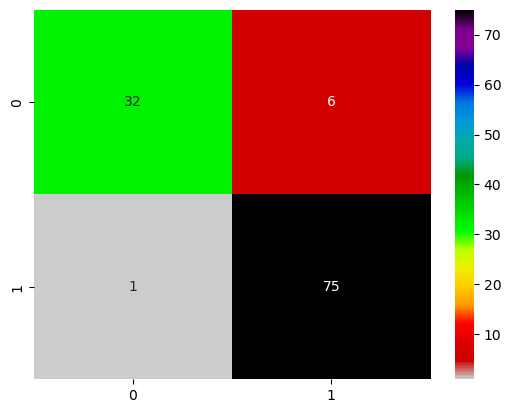

In [199]:
import seaborn as sns 
axes = sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')

In [200]:
# K-Fold Cross-Validation

In [201]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=GNB, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [202]:
# Importing
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [203]:
# Running Multiple Models to Find the Best One:   
estimators = {'GaussianNB': GNB,
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [204]:
# Importing 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [206]:
# Execute the models 
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10,
                  random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                    X=breast_cancer.data, y=breast_cancer.target, 
                    cv=kfold)
    print (f'{estimator_name:>20}:' 
           f'mean accuracy= {scores.mean():.2%}; ' 
           f'standard deviation= {scores.std():.2%}')

          GaussianNB:mean accuracy= 93.85%; standard deviation= 2.75%
KNeighborsClassifier:mean accuracy= 92.79%; standard deviation= 2.01%
  LogisticRegression:mean accuracy= 95.08%; standard deviation= 3.02%
                 SVC:mean accuracy= 91.92%; standard deviation= 3.52%
